In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## FOR JUPYTER

In [4]:
import numpy as np
import pandas as pd
import opendatasets as od
from matplotlib import pyplot as plt

> # **MNIST Neural Network from Scratch w/ mult layers**

Objetivo: Estudar o projeto criado de redes neurais somente com pandas e numpy para análise do dataset MNIST, melhorando o modelo com a adição de mais layers.

DIAGRAMA DO PROJETO: https://app.diagrams.net/#G1aNEniOxCATXECjdoEAyPIMMM3V8dTtxh

Estudo utilizando versão fonte: https://www.youtube.com/watch?v=w8yWXqWQYmU

Baseado no modelo de Samson Zhang: https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/notebook

> **TRAZENDO OS DADOS DO DIGIT-RECOGNIZER**

1. Importando os dados de treino

In [5]:
trainpath = r'Z:\PROJETOS\NEURAL NETWORK\neural-network-from-scratch\DATASET\train.csv'
testpath =  r'Z:\PROJETOS\NEURAL NETWORK\neural-network-from-scratch\DATASET\test.csv'

data = pd.read_csv(trainpath)
data_pd = pd.DataFrame(data)
test = pd.read_csv(testpath)
test_pd = pd.DataFrame(test)

#sample = pd.read_csv('../input/digit-recognizer/sample_submission.csv')

'label' corresponde ao digito (0 - 9)

'pixel' corresponde a escala em cinza (gray-scale) para cada pixel (0 - 784) onde referencia a imagem de 28w x 28h = 784

> # **INICIANDO A CRIAÇÃO DO MODELO MODELO**

> ### Preparando os dados

1. Transformando o dataset em um array com numpy

2. Dimensão dos dados

3. Para garantir que não ocorra **overfitting** baseado na distribuição dos dados, é utilizado a função random.shuffle() para reduzir o risco.

In [6]:
#msk = np.random.rand(len(data)) < 0.8

#train = data[msk]

#test = data[~msk]

data_train = data.sample(frac=0.7, random_state=3)

data_test = data.drop(data_train.index)

X_train = data_train.drop(columns="label")
X_train = np.array(X_train.T)
X_train = X_train / 255.

X_test = data_test.drop(columns="label")
X_test = np.array(X_test.T)
X_test = X_test / 255.

Y_train = data_train["label"]
Y_test = data_test["label"]

In [7]:
len(Y_test), len(X_test)

(12600, 784)

In [3]:
data = np.array(data)   # 1. Transforma o dataset em array
m, n = data.shape       # 2. Dimensão dos dados (rows e features + 1(label))
np.random.shuffle(data) # 3. Elimina o risco de overfitting

test = np.array(test)   # 1. Transforma o dataset em array
tm, tn = test.shape       # 2. Dimensão dos dados (rows e features + 1(label))

In [4]:
data_dev = data[0:1000].T #Transpõe a matriz
Y_dev = data_dev[0]       #Label -> primeira linha
X_dev = data_dev[1:n]     #Features -> 784
X_dev = X_dev / 255.

data_train = data[1000:m].T #Transpõe a matriz
Y_train = data_train[0]     #Label -> primeira linha
X_train = data_train[1:n]   #Features -> 784
X_train = X_train / 255.
_,m_train = X_train.shape


data_test = test[0:tm].T #Transpõe a matriz
X_test = data_test[0:tn]   #Features -> 784
X_test = X_test / 255.
_,m_test = X_test.shape

# CRIANDO A CLASSE NN E ADICIONANDO COST FUNCTION

In [88]:
# classe de redes neurais

# NN pelo método de propagação com treino baseado em gradient descent
class neural_network:
    
    def input_layer(nodes, X):
        #Numero de Features para automatizar input layers
        c, r = neural_network.get_data_shape(X)
        
        #Criando W e b baseado na quantidade de nodes e layers
        W1 = np.random.rand(nodes, c) - 0.5 
        b1 = np.random.rand(nodes, 1) - 0.5
        W2 = np.random.rand(10, nodes) - 0.5
        b2 = np.random.rand(10, 1) - 0.5
        return W1, b1, W2, b2
    
    def get_data_shape(data):
        data = np.array(data)
        c, r = data.shape
        return c, r
    
    def ReLU(Z):
        # Para cada valor de Z, se for maior que 0 retorna Z, se não, retorna 0.
        return np.maximum(Z, 0) 

    def softmax(Z):
        # Função exponencial, então temos e^Z / sum(e^Z)
        A = np.exp(Z) / sum(np.exp(Z)) 
        return A
    
    # Se ReLU é linear, sua derivada é 0 então:
    def ReLU_deriv(Z): 
        # true = 1 false = 0
        return Z > 0 

    def one_hot(Y):
        one_hot_Y = np.zeros((Y.size, Y.max() + 1))
        one_hot_Y[np.arange(Y.size), Y] = 1
        one_hot_Y = one_hot_Y.T
        return one_hot_Y
    
    def forward_prop(W1, b1, W2, b2, X):
        Z1 = W1.dot(X) + b1 # Produto escalar W1 e X(input layer)
        A1 = neural_network.ReLU(Z1)
        Z2 = W2.dot(A1) + b2
        A2 = neural_network.softmax(Z2)
        return Z1, A1, Z2, A2

    def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
        
        c, r = neural_network.get_data_shape(X)
        
        one_hot_Y = neural_network.one_hot(Y)
        dZ2 = A2 - one_hot_Y
        dW2 = 1 / r * dZ2.dot(A1.T)
        db2 = 1 / r * np.sum(dZ2)
        dZ1 = W2.T.dot(dZ2) * neural_network.ReLU_deriv(Z1)
        dW1 = 1 / r * dZ1.dot(X.T)
        db1 = 1 / r * np.sum(dZ1)
        return dW1, db1, dW2, db2

    def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1    
        W2 = W2 - alpha * dW2  
        b2 = b2 - alpha * db2    
        return W1, b1, W2, b2
    
    def get_predictions(A2):
        return np.argmax(A2, 0)
    
    def predict(X, model):
        _, _, _, A2 = neural_network.forward_prop(model["W1"], model["b1"], model["W2"], model["b2"], X)
        predictions = neural_network.get_predictions(A2)
        return predictions
    
    def get_accuracy(predictions, Y):
        return np.sum(predictions == Y) / Y.size
    
    # Treino de modelo com Cost Function (1 - acuracia) do modelo e dos dados de teste
    def train_wcost(X, Y, X_test, Y_test, alpha, iterations, nodes):
        
        cost_train = []
        cost_test = []
        epoch = []
        
        model = {}
        cost_function = {}
        
        W1, b1, W2, b2 = neural_network.input_layer(nodes ,X) # Cria parametros de Weight e Bias
        
        for i in range(iterations):
            Z1, A1, Z2, A2 = neural_network.forward_prop(W1, b1, W2, b2, X)
            dW1, db1, dW2, db2 = neural_network.backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
            W1, b1, W2, b2 = neural_network.update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
            
            predictions = neural_network.get_predictions(A2)
            accuracy = neural_network.get_accuracy(predictions, Y)
            
            _, _, _, A2_test = neural_network.forward_prop(W1, b1, W2, b2, X_test)
            predictions_test = neural_network.get_predictions(A2_test)
            accuracy_test = neural_network.get_accuracy(predictions_test, Y_test)
            
            cost_train.append(1 - accuracy)
            cost_test.append(1 - accuracy_test)
            epoch.append(i)
            
            if i % 10 == 0: # Para cada 10 iterations, print
                print("Iteration: ", i)
                print("Cost Function Train: ", 1 - accuracy)
                print("Cost Function Test: ", 1 - accuracy_test)

        model["W1"] = W1
        model["b1"] = b1    
        model["W2"] = W2
        model["b2"] = b2
        
        cost_function["cost_train"] = cost_train
        cost_function["cost_test"] = cost_test
        
        nn_model = {"model": model, "cost_function": cost_function}
        
        plt.plot(epoch, cost_train)
        plt.plot(epoch, cost_test)
        
        return nn_model
    
    def train(X, Y, alpha, iterations, nodes):
            
        model = {}
        
        W1, b1, W2, b2 = neural_network.input_layer(nodes ,X) # Cria parametros de Weight e Bias
        for i in range(1, iterations+1):
            Z1, A1, Z2, A2 = neural_network.forward_prop(W1, b1, W2, b2, X)
            dW1, db1, dW2, db2 = neural_network.backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
            W1, b1, W2, b2 = neural_network.update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
            
            predictions = neural_network.get_predictions(A2)
            accuracy = neural_network.get_accuracy(predictions, Y)
            
            if i % 10 == 0: # Para cada 10 iterations, print
                print("Iteration: ", i)
                print(accuracy)
        
        model["W1"] = W1
        model["b1"] = b1    
        model["W2"] = W2
        model["b2"] = b2
        
        return model

In [21]:
c, r = neural_network.get_data_shape(X_train)

In [89]:
model = neural_network.train(X_train, Y_train, 0.15, 20, 10)
predicao = neural_network.predict(X_train, model)
neural_network.get_accuracy(predicao, Y_train)

Iteration:  10
0.21904761904761905
Iteration:  20
0.29391156462585033


0.30153061224489797

In [91]:
model

{'W1': array([[ 0.47350435,  0.45025007, -0.18518184, ..., -0.03003692,
         -0.06633885, -0.49278502],
        [ 0.45357097, -0.35827733,  0.02297428, ...,  0.24975407,
         -0.48443128,  0.29502118],
        [ 0.3217067 ,  0.06942456, -0.41215498, ..., -0.46458967,
         -0.49120043, -0.13467745],
        ...,
        [-0.31592883,  0.20448971, -0.10156605, ...,  0.34577484,
         -0.26925009, -0.48998469],
        [ 0.24517582, -0.3075777 , -0.38486624, ...,  0.14552995,
          0.26937584,  0.04737998],
        [-0.18154813,  0.32922116, -0.10937361, ...,  0.36437508,
          0.09805297,  0.38578489]]),
 'b1': array([[-0.62204311],
        [-0.56896125],
        [-0.67349729],
        [-0.66971015],
        [-0.6723169 ],
        [-0.66099177],
        [ 0.02405709],
        [ 0.07443655],
        [-0.40813815],
        [-0.37190231]]),
 'W2': array([[-4.72212348e-01,  9.64341305e-02,  1.22824071e-01,
          2.54087138e-01,  3.82646687e-01,  1.84682848e-01,
   

Iteration:  0
Cost Function Train:  0.9091836734693878
Cost Function Test:  0.9094444444444445
Iteration:  10
Cost Function Train:  0.8590476190476191
Cost Function Test:  0.8482539682539683


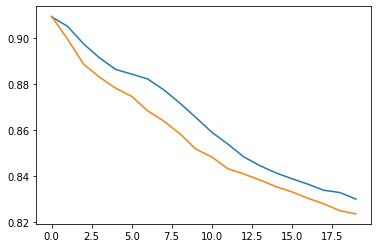

In [95]:
model = neural_network.train_wcost(X_train, Y_train, X_test, Y_test, 0.1, 20, 10)

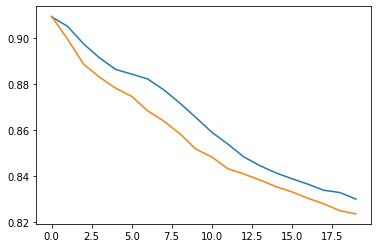

In [97]:
plt.plot(model['cost_function']['cost_train'])
plt.plot(model['cost_function']['cost_test'])

In [96]:
model

{'model': {'W1': array([[ 0.29908886, -0.06160626,  0.20795213, ...,  0.22665513,
          -0.28825918,  0.30799551],
         [ 0.35143728,  0.03127805, -0.27302507, ..., -0.16820307,
          -0.10636203, -0.44718655],
         [-0.23190785,  0.26249922,  0.24257138, ..., -0.10972198,
          -0.01082894, -0.32492633],
         ...,
         [-0.43349761,  0.31067148,  0.40899244, ...,  0.31920922,
          -0.21265374, -0.41095722],
         [ 0.22131821, -0.04967163,  0.1340737 , ...,  0.29553343,
           0.30165281,  0.19376674],
         [ 0.44519515, -0.054213  ,  0.45552729, ...,  0.00931147,
           0.02213113, -0.41348612]]),
  'b1': array([[-0.42388785],
         [-0.85852487],
         [ 0.11572534],
         [-0.48871887],
         [-0.64640462],
         [-0.45052228],
         [-0.68162992],
         [-0.00651765],
         [-0.27780028],
         [-0.56611292]]),
  'W2': array([[-0.09588155,  0.43436749,  0.4582262 , -0.4334315 , -0.35456519,
          -0.007

## MULTIPLE HIDDEN LAYERS

In [1]:
# classe de redes neurais

# NN pelo método de propagação com treino baseado em gradient descent
class neural_network:
    
    def input_layer(nodes, X):
        #Numero de Features para automatizar input layers
        X = np.array(X)
        m, n = X.shape

        #Criando W e b baseado na quantidade de nodes e layers
        W1 = np.random.rand(nodes, m) - 0.5 
        b1 = np.random.rand(nodes, 1) - 0.5
        W2 = np.random.rand(10, nodes) - 0.5
        b2 = np.random.rand(10, 1) - 0.5
        return W1, b1, W2, b2
    
    def ReLU(Z):
        # Para cada valor de Z, se for maior que 0 retorna Z, se não, retorna 0.
        return np.maximum(Z, 0) 

    def softmax(Z):
        # Função exponencial, então temos e^Z / sum(e^Z)
        A = np.exp(Z) / sum(np.exp(Z)) 
        return A

    # Se ReLU é linear, sua derivada é 0 então:
    def ReLU_deriv(Z): 
        # true = 1 false = 0
        return Z > 0 

    def one_hot(Y):
        one_hot_Y = np.zeros((Y.size, Y.max() + 1))
        one_hot_Y[np.arange(Y.size), Y] = 1
        one_hot_Y = one_hot_Y.T
        return one_hot_Y
    
    def forward_prop(W1, b1, W2, b2, X):
        Z1 = W1.dot(X) + b1 # Produto escalar W1 e X(input layer)
        A1 = neural_network.ReLU(Z1)
        Z2 = W2.dot(A1) + b2
        A2 = neural_network.softmax(Z2)
        return Z1, A1, Z2, A2

    def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
        one_hot_Y = neural_network.one_hot(Y)
        dZ2 = A2 - one_hot_Y
        dW2 = 1 / m * dZ2.dot(A1.T)
        db2 = 1 / m * np.sum(dZ2)
        dZ1 = W2.T.dot(dZ2) * neural_network.ReLU_deriv(Z1)
        dW1 = 1 / m * dZ1.dot(X.T)
        db1 = 1 / m * np.sum(dZ1)
        return dW1, db1, dW2, db2

    def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1    
        W2 = W2 - alpha * dW2  
        b2 = b2 - alpha * db2    
        return W1, b1, W2, b2
    
    def get_predictions(A2):
        return np.argmax(A2, 0)
    
    def predict(X, model):
        _, _, _, A2 = neural_network.forward_prop(model[0], model[1], model[2], model[3], X)
        predictions = neural_network.get_predictions(A2)
        return predictions
    
    def get_accuracy(predictions, Y):
        return np.sum(predictions == Y) / Y.size
    
    # Treino de modelo com Cost Function (1 - acuracia) do modelo e dos dados de teste
    def train_wcost(X, Y, X_test, Y_test, alpha, iterations, nodes):
        
        nn_model = {}
        cost_train = []
        cost_test = []
        epoch = []
        
        W1, b1, W2, b2 = neural_network.input_layer(nodes ,X) # Cria parametros de Weight e Bias
        
        for i in range(iterations):
            Z1, A1, Z2, A2 = neural_network.forward_prop(W1, b1, W2, b2, X)
            dW1, db1, dW2, db2 = neural_network.backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
            W1, b1, W2, b2 = neural_network.update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
            
            predictions = neural_network.get_predictions(A2)
            accuracy = neural_network.get_accuracy(predictions, Y)
            
            _, _, _, A2_test = neural_network.forward_prop(W1, b1, W2, b2, X_test)
            predictions_test = neural_network.get_predictions(A2_test)
            accuracy_test = neural_network.get_accuracy(predictions_test, Y_test)
            
            cost_train.append(1 - accuracy)
            cost_test.append(1 - accuracy_test)
            epoch.append(i)
            
            nn_model["W1","b1", "W2", "b2", "cost_train", "cost_test"] = W1, b1, W2, b2, np.array(cost_train), np.array(cost_test)
            
            if i % 10 == 0: # Para cada 10 iterations, print
                print("Iteration: ", i)
                print("Cost Function Train: ", 1 - accuracy)
                print("Cost Function Test: ", 1 - accuracy_test)

        print(nn_model)
        
        plt.plot(epoch, cost_train)
        plt.plot(epoch, cost_test)
        
        return W1, b1, W2, b2, np.array(cost_train), np.array(cost_test), np.array(epoch), plt.show()
    
    def train(X, Y, alpha, iterations, nodes, learning_curve):
            
        cost = []
        epoch = []
        
        W1, b1, W2, b2 = neural_network.input_layer(nodes ,X) # Cria parametros de Weight e Bias
        for i in range(1, iterations+1):
            Z1, A1, Z2, A2 = neural_network.forward_prop(W1, b1, W2, b2, X)
            dW1, db1, dW2, db2 = neural_network.backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
            W1, b1, W2, b2 = neural_network.update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
            
            predictions = neural_network.get_predictions(A2)
            accuracy = neural_network.get_accuracy(predictions, Y)
            
            if i % 1 == 0: # Para cada 10 iterations, print
                print("Iteration: ", i)
                print(accuracy)
                
        return W1, b1, W2, b2

In [ ]:
model = neural_network.train(X_train, Y_train, 0.15, 20, 10, False)
predicao = neural_network.predict(X_train, model)
neural_network.get_accuracy(predicao, Y_train)